# Predicting House Prices in Iowa by Oliver Pan

## 1.0 Overview

Buying a house can be extremely difficult. For example, let's say that you want a house with a nice basement, three garages, and lots of space. How would we know how much this house costs? Well, in machine learning, we can use regression to predict house prices, given different variables. For instance, as seen below, the number of cars that the house can hold heavily influences the sale price. In this overview, I will demonstrate regression models being used, and how you can predict the cost of your next house in Iowa. Remember, the people of Iowa welcome you!

**Note:** This file is an overview of the findings. Further analysis can be found in various notebooks throughout the repository

#### Source: https://www.kmaland.com/

![img](https://github.com/oliverkpan/IowaHousePricing/blob/master/iowa_image.png?raw=true)

## 2.0 Import Data & Libraries

In [2]:
#Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Basic Regression and ML libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#Advanced Regression Libraries
from catboost import CatBoostRegressor, Pool

#Mathematical Libraries
from math import sqrt
from scipy import stats

In [3]:
#DataFrame for analysis and ML Models
main_df = pd.read_csv(r'/Users/OliverPan/Desktop/house/train.csv')
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.0 Analysis of Dataset (Basic EDA)

### 3.1 Physical Attributes of Dataset

In [4]:
#Number of Rows and Columns
main_df.shape

(1460, 81)

In [5]:
#We can see that there are many columns, so we need to break them down into smaller dataframes for analysis
main_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

### 3.2 See NA values in data

In [6]:
#See columns with null values (19 colums)
na_check = main_df.isnull().sum().to_frame()
na_check = na_check[na_check[0] != 0]
len(na_check)

19

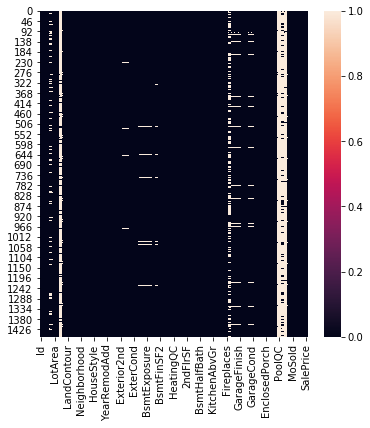

In [9]:
#See NaN Values
plt.figure(figsize=[6,6])
sns.heatmap(main_df.isnull())

In [10]:
#See continuous columns and describe values (We can condense this later)
main_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4.0 Analysis of target variable

Text(0.5, 1.0, 'Univariate Distribution of Sale Price')

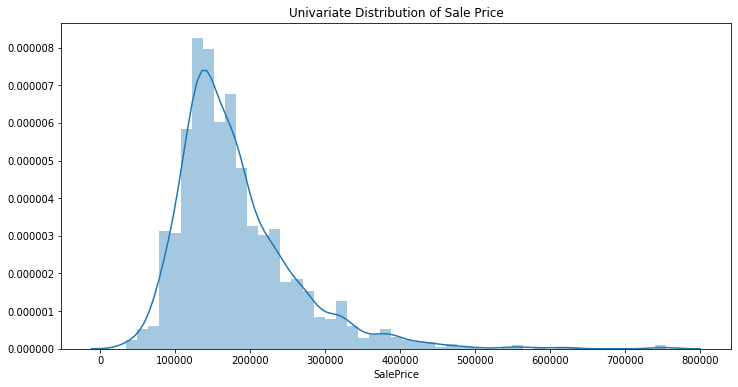

In [11]:
#See univariate distribution of SalePrice
plt.figure(figsize=[12, 6])
sns.distplot(main_df["SalePrice"])
plt.title("Univariate Distribution of Sale Price")

### 4.1 Descriptive Statistics

In [12]:
#Examine data and search for anomalies
main_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Descriptive Statistics of SalePrice')

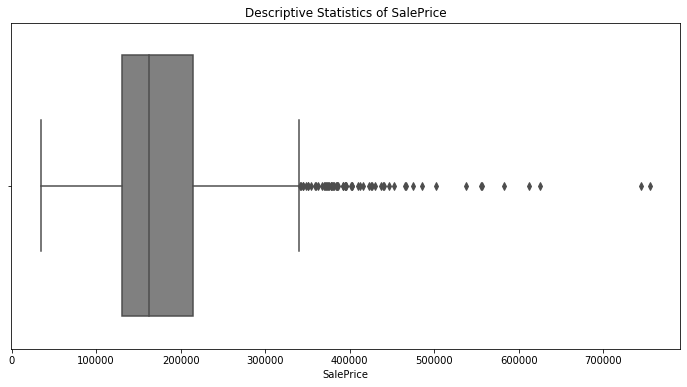

In [13]:
#Visual Representation via boxplot
plt.figure(figsize=[12, 6])
sns.boxplot(main_df["SalePrice"], color = "grey")
plt.title("Descriptive Statistics of SalePrice")

### 4.2 Inferential Statistics

In [14]:
#Find z-score
z_test = np.array(main_df["SalePrice"])
stats.zscore(z_test)

array([ 0.34727322,  0.00728832,  0.53615372, ...,  1.07761115,
       -0.48852299, -0.42084081])

In this situation, the z-score demonstrates how far away the sale price is away from the sample mean. Essentialy, this shows the number of standard deviations away from the mean

## 5.0 Analysis of features with ML models

During the analysis, I decided to break down the 80 variables into smaller dataframes for analysis. At the end, I will combine them and provide a final model that has the lowest normalised RMSE. I will also deploy the model either with Streamlit or Flask.

When analysing features, I will look at correlation with SalePrice, feature importance, RMSE, and overall impact on model.

In [15]:
#Here are the columns again
main_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

### 5.1 The Basics (Columns we know that have strong impact to ML Model)

Refer to [main_analysis_catboost](https://github.com/oliverkpan/IowaHousePricing/blob/master/main_analysis_catboost.ipynb) for a detailed explanation of the various columns

In [16]:
#Basic Columns df
basic_df = main_df[["SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]
basic_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


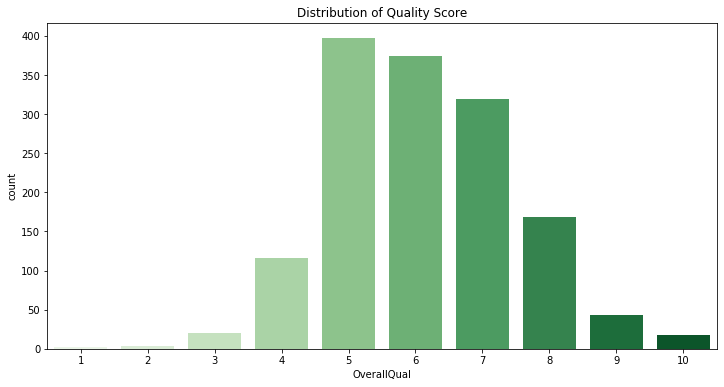

In [20]:
#Counting the quality of houses
plt.figure(figsize=[12,6])
plt.title("Distribution of Quality Score")
sns.countplot(main_df["OverallQual"], palette = "Greens")

#### Generally, houses are high quality. I found that the higher quality houses are harder to predict, meaning we need to implement more features that can help with predicting more accurate

In [24]:
#Convert columns to categorical
basic_df["YearBuilt"] = basic_df["YearBuilt"].astype('category').cat.codes
basic_df["Street"] = basic_df["Street"].astype('category').cat.codes
basic_df["LotShape"] = basic_df["LotShape"].astype('category').cat.codes

#Sample model and prediction
X = basic_df.drop(["SalePrice"], axis = 1)
y = basic_df[["SalePrice"]]

/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [28]:
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,204569.603268
1,133000,167018.433809
2,110000,127093.652266
3,192000,211353.006758
4,88000,158028.774949


In [29]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.0660710742140805

## Sources

[Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
[Investopedia](https://www.investopedia.com/)